In [1]:
import math
import numpy as np
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
from scipy.stats.contingency import crosstab
from scipy.stats import chi2_contingency
from scipy.stats import rv_continuous

Problem 1.

point a)

In [2]:
n = 1000
t = np.linspace(0,1,n+1)
seq = bernoulli.rvs(0.5, size = n, random_state = 1)
seq_modif = [2*s-1 for s in seq]
    
path_raw = np.cumsum(seq_modif)/math.sqrt(n)
path = np.insert(path_raw,0,0)
w1= path[1000]
b_t = path - t*w1
b_t

array([ 0.        , -0.03200225, -0.00075895, ...,  0.00075895,
       -0.0312433 ,  0.        ])

In [3]:
def bb_simulations(n_paths, granularity):
    paths = []
    t = np.linspace(0,1,granularity+1)
    for i in range(0,n_paths):
        seq = bernoulli.rvs(0.5, size = granularity, random_state = i)
        seq_modif = [2*s-1 for s in seq]
        path_raw = np.cumsum(seq_modif)/math.sqrt(granularity+1)
        path = np.insert(path_raw,0,0)
        w1 = path[-1]
        b_t =path -t*w1
        paths.append(b_t)

    return paths



In [4]:
N = 7
n=1000
Bt = bb_simulations(N, n)
Bt


[array([ 0.        ,  0.03268161,  0.06536323, ..., -0.00214927,
        -0.03268161,  0.        ]),
 array([ 0.        , -0.03198626, -0.00075857, ...,  0.00075857,
        -0.03122769,  0.        ]),
 array([ 0.        , -0.0294577 , -0.05891541, ..., -0.0675125 ,
        -0.03375625,  0.        ]),
 array([0.        , 0.03084841, 0.06169682, ..., 0.06473109, 0.03236554,
        0.        ]),
 array([0.        , 0.03040591, 0.06081182, ..., 0.06561608, 0.03280804,
        0.        ]),
 array([ 0.        , -0.03148055,  0.00025286, ..., -0.00025286,
        -0.0317334 ,  0.        ]),
 array([ 0.        ,  0.03141734, -0.00037928, ...,  0.00037928,
         0.03179662,  0.        ])]

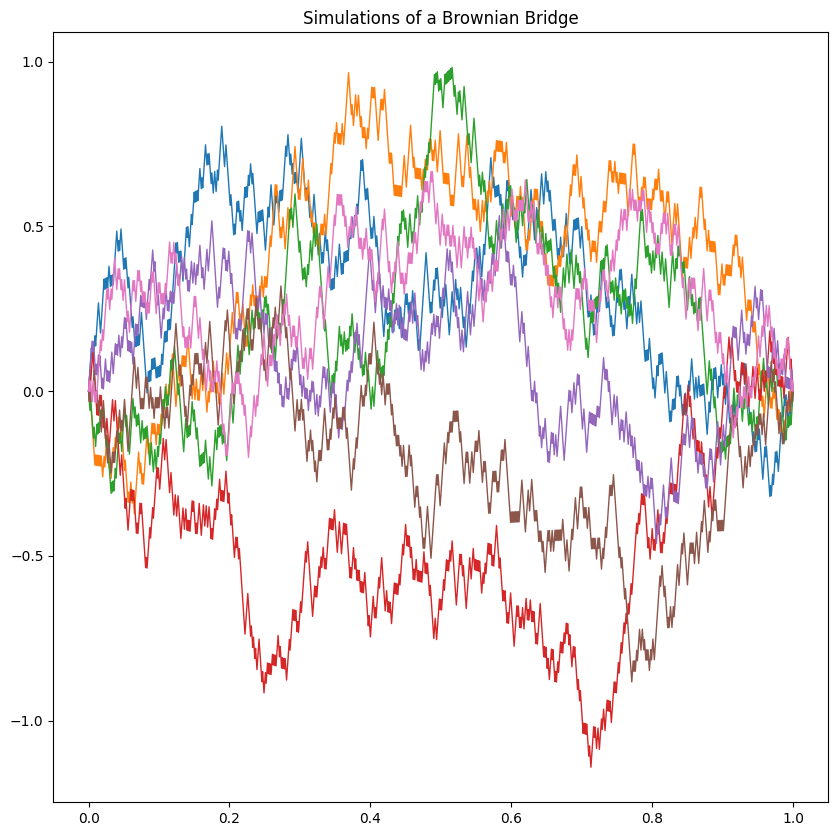

In [5]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

for i in range(0,N):
    plt.plot(t, Bt[i], linewidth = 1)
    
plt.title('Simulations of a Brownian Bridge')
plt.show()

point b)

In [6]:
N1 = 1000
n1 = 100
B_t1 = bb_simulations(N1, n1)
B_05 = [b[50] for b in B_t1]
print(np.mean(B_05))


-0.008159304959721916


In [7]:
B_03 = [b[30] for b in B_t1]
np.cov(B_05,B_03)[0][1]

0.15379545882516177

$$
\gamma(t,s) = Cov(B_t, B_s) = Cov(W_t - tW_1, W_s-sW_1) = \\
= Cov (W_t, W_s) - tCov(W_1, W_s)-s Cov(W_1, W_t)+tsCov(W_1, W_1) =\\
= min\{t,s\} - t min\{1,s\} - s min\{1,t\} + ts Var(W_1) =\\
= min\{t,s\} - ts - ts + ts*1= min\{t,s\} - ts
$$

In [8]:
X = B_03
Y = [b[50]-path[30] for b in B_t1]

point c)

In [9]:
def categories_count(vec):
    freqs = []
    for i in range(0, N1):
        if vec[i]<=-1:
            freqs.append(1)
        elif vec[i]>-1 and vec[i]<1:
            freqs.append(2)
        else:
            freqs.append(3)
    return freqs

count_X = categories_count(X)
count_Y = categories_count(Y)
cont_table = crosstab(count_X, count_Y)
ans = chi2_contingency(cont_table[1])
p_val = ans[1]
p_val


4.544931337810626e-26

The null hypothesis, which states that the increments of Brownian bridge are independent, should not be rejected, as p-value is very small. They are independent indeed.

Problem 2.\
point a)

In [10]:
def custom_pdf(x):
    res = 2/(math.pi*(math.exp(-x) +math.exp(x)))
    return res


In [11]:
class custom_distr(rv_continuous):
    def _pdf(self, x):
        return custom_pdf(x)

In [12]:
custom = custom_distr()
# mean = custom.mean()
# std = custom.std()
# med = custom.median()

None of the above works

point b)

In [13]:
sample = custom.rvs(size = 10, random_state = 1)

OverflowError: math range error

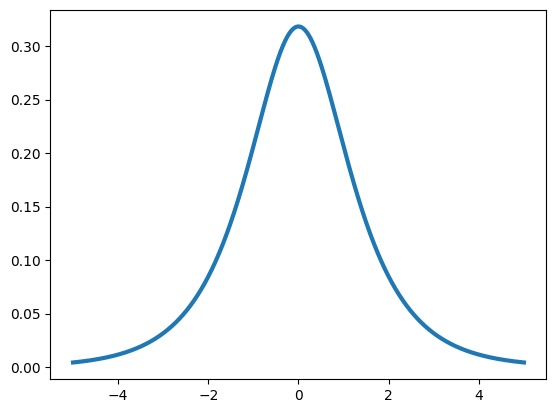

In [ ]:
x_ = np.linspace(-5, 5, 1000)
fx_ = [custom. pdf(x) for x in x_]
# plt.hist(x = sample, bins = 30, density = True, range = (-5,5))
plt.plot(x_, fx_, linewidth=3)
plt.show()